<a href="https://colab.research.google.com/github/Abhishekravindran/Computer_vision_projects/blob/main/image_sentiment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deliverable on stage 1:

 
What are questions/insights that could come up in Exploratory Data Analysis of the dataset For eg any challenges in the dataset to which any kind of data preprocessing is required? State at least 5 valuable insights and how will you enable your team to analyze big data at scale? 


1) After loading the data set we would look at the image dimensions and check if its of three band(RGB)/channels

2) Check if its byte Scaled

3) extract a pixel matrix and plot histogram for images  / number of colours appeared plotting via histograms

4)Data preprocessing:a)first to check if all the images are in the correct formats and create a list if so and get the paths of each images 

5)if not in correct format change it into a similar format and then proceed

6)Resize the image since images can be of different dimensions and to proceed with analysis we need images in the same dimensions

7)RGB to Gray scale in most of the cases for furthe processing since if we consider an image of size 600*800*3 i.e a 3 channel image then convering it would give us less params to train over i.e 600*800

8)We can also perform image augmentation if necessary 

Big data the term never confines how big the data w.r.t its volume and varitey and the velocity at which we are recieving the data we can process big data to get data driven discovery and perform various analysis types like prescriptive,predictive,descriptive and the data is mostly in unstructured/semi-structured format and that we process the unstructured data to a viable format for further insights 
At any point of time to analyze big data we should reffer to its meta data , there are few basic components which are term specific i.e HDFS , map-reduce , Google tables , no-sql  

Deliverable on stage 2:

What predictive ML models can be built on this dataset? For eg detecting any particular face attribute or sentiment expressed by the celebrity in the image etc. Implement one of the predictive models using this dataset, dockerize it and host this model as API and also explain why you selected a particular use case.


emotion detection can be built with the given dataset, and we can even create fake images from the given data set with the help of Gan's,
classify images based on attributes, image segmentation , pixel extractions,image compression and background removal, and decompression using autoencoders. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
tf.__version__

'2.5.0'

Lets Classify the set of given images into their respective emotions and keep a count and store each of them in a seperate file

In [2]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 2.9MB/s 


In [3]:
import os
os.mkdir('/content/sample_data/celeb_unzip')

In [4]:
import os
os.mkdir('/content/sample_data/face_extracted')

In [6]:
from zipfile import ZipFile
ZipFile("/content/celeb.zip").extractall("/content/sample_data/celeb_unzip")

In [7]:
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN
import cv2

In [8]:
detector=MTCNN()#fitting the mtcnn model

In [9]:
from google.colab.patches import cv2_imshow

In [10]:
def get_paths():
  paths=[os.path.join('/content/sample_data/celeb_unzip/celeb',f)for f in os.listdir('/content/sample_data/celeb_unzip/celeb')]
  return paths
full_file_paths=get_paths()

In [11]:
def extract_face(image,resize=(244,244)):
  image=cv2.imread(image)

  faces=detector.detect_faces(image)#detecting the faces from the image which mtcnn is doing in background 
  face_images = []#creating list to store the diffrent faces returned

  for face in faces:
    x1,y1,width,height=faces[0]['box'] #a image will have 4 components from its detected point i.e  
    x2,y2=x1+width,y1+height

    face_boundary=[]

    face_boundary=image[y1:y2,x1:x2]

    face_image=cv2.resize(face_boundary,resize)

  return face_image

In [12]:
path='/content/sample_data/face_extracted'
count=0
for i in full_file_paths:
  try:
    x=extract_face(i)
    #cv2_imshow(x)
    cv2.imwrite(os.path.join(path,"img"+str(count)+".jpg"), x)#writing to path
    count+=1
  except:
    continue  

Now since we have extracted only the faces from the image lets do emotion classification over it .

In [17]:
!pip install rmn==3.0.0a4

     |████████████████████████████████| 112kB 2.8MB/s 
     |████████████████████████████████| 532kB 11.9MB/s 


In [18]:
from rmn import RMN
m=RMN()

pretrained_ckpt does not exists!


deploy.prototxt.txt does not exists!


res10_300x300_ssd_iter_140000.caffemodel does not exists!


In [19]:
import os
os.mkdir('/content/sample_data/emotion_det')

In [20]:
import os

In [21]:
def get_paths1():
  paths=[os.path.join('/content/sample_data/face_extracted',f)for f in os.listdir('/content/sample_data/face_extracted')]
  return paths
full_paths=get_paths1()


In [22]:
len(full_paths),full_file_paths[0]

(2667, '/content/sample_data/celeb_unzip/celeb/000048.jpg')

In [23]:
import os
os.mkdir('/content/sample_data/alldata')
os.mkdir('/content/sample_data/alldata/happy')
os.mkdir('/content/sample_data/alldata/sad')
os.mkdir('/content/sample_data/alldata/angry')
os.mkdir('/content/sample_data/alldata/disgust')
os.mkdir('/content/sample_data/alldata/fear')
os.mkdir('/content/sample_data/alldata/suprise')
os.mkdir('/content/sample_data/alldata/neutral')

In [24]:
def emotion_det(image):
  img=cv2.imread(image)
  
  
  results=m.detect_emotion_for_single_face_image(img)
  
  if results[0]=='happy':
    
    path='/content/sample_data/alldata/happy'
    cv2.imwrite(os.path.join(path,"happy"+str(count)+".jpg"), img)
    

  elif results[0]=='angry':
    
    path='/content/sample_data/alldata/angry'
    cv2.imwrite(os.path.join(path,"angry"+str(count)+".jpg"), img)
    
  
  elif results[0]=='sad':
    
    path='/content/sample_data/alldata/sad'
    cv2.imwrite(os.path.join(path,"sad"+str(count)+".jpg"), img)
    
    
  
  elif results[0]=='disgust':
   
    path='/content/sample_data/alldata/disgust'
    cv2.imwrite(os.path.join(path,"disgust"+str(count)+".jpg"), img)
    

  
  elif results[0]=='fear':
 
    path='/content/sample_data/alldata/fear'
    cv2.imwrite(os.path.join(path,"fear"+str(count)+".jpg"), img)
    

  
  elif results[0]=='suprise':
    
    path='/content/sample_data/alldata/suprise'
    cv2.imwrite(os.path.join(path,"suprise"+str(count)+".jpg"), img)
        

  
  elif results[0]=='neutral':
    path='/content/sample_data/alldata/neutral'
    cv2.imwrite(os.path.join(path,"neutral"+str(count)+".jpg"), img)
    
  

In [25]:
count=0
for i in full_paths:
  emotion_det(i)
  count+=1

KeyboardInterrupt: ignored

In [ ]:
import cv2
image=cv2.imread("/content/sample_data/face_extracted/img10.jpg")
#assert image is not None
results=m.detect_emotion_for_single_face_image(image)
print(results)
results[0]=='happy'

('disgust', 0.8318043351173401, [{'angry': 0.10913478583097458}, {'disgust': 0.8318043351173401}, {'fear': 0.0011027170112356544}, {'happy': 0.002712611109018326}, {'sad': 0.008397737517952919}, {'surprise': 0.004161078482866287}, {'neutral': 0.042686667293310165}])


False

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization

In [28]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
train_dataset = training_generator.flow_from_directory('/content/sample_data/alldata',
                                                        target_size = (48, 48),
                                                        batch_size = 16,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 352 images belonging to 7 classes.


In [ ]:
train_dataset.classes

In [25]:
np.unique(train_dataset.classes, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 78,  26,   5, 548, 209,  21]))

In [26]:
train_dataset.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'suprise': 6}

In [27]:
num_detectors = 32
num_classes = 7
width, height = 48, 48
epochs = 70

network = Sequential()

network.add(Conv2D(num_detectors, (3,3), activation='relu', padding = 'same', input_shape = (width, height, 3)))
network.add(BatchNormalization())
network.add(Conv2D(num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(2*2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(Conv2D(2*2*2*num_detectors, (3,3), activation='relu', padding = 'same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(2 * num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(2 * num_detectors, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(num_classes, activation='softmax'))
print(network.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        1

In [ ]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
network.fit(train_dataset, epochs=epochs)

In [ ]:
model_json = network.to_json()
with open('network_emotions.json','w') as json_file:
  json_file.write(model_json)

In [ ]:
from keras.models import save_model
network_saved = save_model(network, '/content/weights_emotions.hdf5')

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
with open('/content/drive/MyDrive/computer vision/Computer Vision Masterclass/Weights/network_emotions.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 48, 48, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_8_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_8", "trainable": true, "batch_input_shape": [null, 48, 48, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "BatchNormalization", "config": {"name": "batch_normalization_8", "trainable": true, "dtype": "float32", "axis": [3], "momentum": 0.99, "epsilon": 0

In [30]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('/content/drive/MyDrive/computer vision/Computer Vision Masterclass/Weights/weights_emotions.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [31]:
network_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)       

#now lets classify a single image

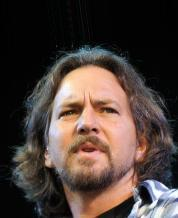

In [32]:
image = cv2.imread('/content/sample_data/celeb_unzip/celeb/000020.jpg')
cv2_imshow(image)

In [33]:
image.shape

(218, 178, 3)

In [34]:
face_det=extract_face('/content/sample_data/celeb_unzip/celeb/000020.jpg')

In [36]:
face_det.shape

(244, 244, 3)

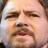

In [37]:
roi = cv2.resize(face_det, (48, 48))
cv2_imshow(roi)

In [ ]:
roi = roi / 255
roi

In [39]:
roi = np.expand_dims(roi, axis = 0)
roi.shape

(1, 48, 48, 3)

In [40]:
probs = network_loaded.predict(roi)
probs

array([[0.5326567 , 0.00363777, 0.2377002 , 0.00055033, 0.00481412,
        0.21134596, 0.0092949 ]], dtype=float32)

In [41]:
result = np.argmax(probs)
result

0

In [43]:
train_dataset.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'suprise': 6}

with the above we can come to the conclusion that the given image was classified as angry

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential ,Model
from tensorflow.keras.layers import Dense,Input,MaxPool2D,Flatten
import numpy as np 
import matplotlib.pyplot as plt

In [118]:
def extract_f(file_name,required_size=(160,160)):
    image = Image.open(file_name)
    image = image.convert('RGB')
    pixels = np.asarray(image)
    image = Image.fromarray(pixels)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array



def load_face(dir):
    faces = list()
    for filename in os.listdir(dir):
        path = dir + filename
        face = extract_f(path)
        faces.append(face)
    return faces

def load_dataset(dir):
    X, y = list(), list()
    for subdir in os.listdir(dir):
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir))
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)


trainX, trainy = load_dataset('/content/sample_data/alldata/')
print(trainX.shape, trainy.shape)

loaded 32 sample for class: angry
loaded 12 sample for class: disgust
loaded 90 sample for class: neutral
loaded 7 sample for class: sad
loaded 0 sample for class: suprise
loaded 2 sample for class: fear
loaded 209 sample for class: happy
(352, 160, 160, 3) (352,)


In [53]:
trainX1=trainX.shape[1:]

In [37]:
import os
os.mkdir('/content/sample_data/blk_whitimg')

In [45]:
def blk_wht(image):
  img=Image.open(image)
  img1=img.convert('L')
  img1=np.expand_dims(img1,axis=-1)
  path='/content/sample_data/blk_whitimg'
  cv2.imwrite(os.path.join(path,"img"+str(count)+".jpg"), img1)


In [46]:
count=0
for i in full_file_paths:
  blk_wht(i)
  count+=1
  


In [84]:
import os
os.mkdir('/content/sample_data/blk_whitimg1')

In [92]:
width=128
height=128
image = cv2.imread('/content/sample_data/blk_whitimg1/img0.jpg')
(H, W) = image.shape[:2]
image = cv2.resize(image, (width, height))

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image.shape

(128, 128)

In [87]:
def img(img):  
  width=128
  height=128
  image = cv2.imread(img)
  (H, W) = image.shape[:2]
  image = cv2.resize(image, (width, height))

  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  #image=np.expand_dims(image,axis=-1)
  dim=(width,height)
  resized=cv2.resize(image,dim)
  path='/content/sample_data/blk_whitimg1'
  cv2.imwrite(os.path.join(path,"img"+str(count)+".jpg"), image)


In [88]:
count=0
for i in full_paths1:
  img(i)
  count+=1

In [89]:
image = cv2.imread('/content/sample_data/blk_whitimg1/img1.jpg')
image.shape

(128, 128, 3)

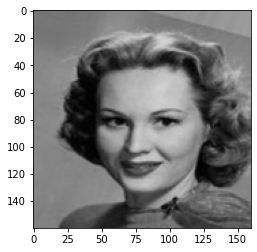

In [94]:
plt.imshow(trainX[3],cmap='gray');

In [ ]:
for image_path in files_paths1:
  #print(image_path)
  try:
    image = cv2.imread(image_path)
    (H, W) = image.shape[:2]
  except:
    continue

  image = cv2.resize(image, (width, height))
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [50]:
import os
os.mkdir('/content/sample_data/procsdim')

In [51]:
def get_paths2():
  paths=[os.path.join('/content/sample_data/blk_whitimg',f)for f in os.listdir('/content/sample_data/blk_whitimg')]
  return paths
full_paths1=get_paths2()

#/content/sample_data/blk_whitimg

In [52]:
import os
os.mkdir('/content/sample_data/alldata1')
os.mkdir('/content/sample_data/alldata1/happy')
os.mkdir('/content/sample_data/alldata1/sad')
os.mkdir('/content/sample_data/alldata1/angry')
os.mkdir('/content/sample_data/alldata1/disgust')
os.mkdir('/content/sample_data/alldata1/fear')
os.mkdir('/content/sample_data/alldata1/suprise')
os.mkdir('/content/sample_data/alldata1/neutral')

In [53]:
def emotion_det1(image):
  img=cv2.imread(image)
  
  
  results=m.detect_emotion_for_single_face_image(img)
  
  if results[0]=='happy':
    
    path='/content/sample_data/alldata1/happy'
    cv2.imwrite(os.path.join(path,"happy"+str(count)+".jpg"), img)
    

  elif results[0]=='angry':
    
    path='/content/sample_data/alldata1/angry'
    cv2.imwrite(os.path.join(path,"angry"+str(count)+".jpg"), img)
    
  
  elif results[0]=='sad':
    
    path='/content/sample_data/alldata1/sad'
    cv2.imwrite(os.path.join(path,"sad"+str(count)+".jpg"), img)
    
    
  
  elif results[0]=='disgust':
   
    path='/content/sample_data/alldata1/disgust'
    cv2.imwrite(os.path.join(path,"disgust"+str(count)+".jpg"), img)
    

  
  elif results[0]=='fear':
 
    path='/content/sample_data/alldata1/fear'
    cv2.imwrite(os.path.join(path,"fear"+str(count)+".jpg"), img)
    

  
  elif results[0]=='suprise':
    
    path='/content/sample_data/alldata1/suprise'
    cv2.imwrite(os.path.join(path,"suprise"+str(count)+".jpg"), img)
        

  
  elif results[0]=='neutral':
    path='/content/sample_data/alldata1/neutral'
    cv2.imwrite(os.path.join(path,"neutral"+str(count)+".jpg"), img)

In [54]:
count=0
for i in full_paths1:
  emotion_det1(i)
  count+=1

KeyboardInterrupt: ignored

In [61]:
trainX=trainX/.255
trainX.shape

(250, 160, 160, 3)

In [59]:
trainX.shape

(250, 160, 160, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


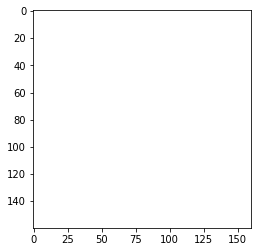

In [64]:
i=np.random.randint(0,250)
plt.imshow(trainX[i],cmap='gray');

In [58]:

training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)
train_dataset = training_generator.flow_from_directory('/content/sample_data/alldata1/',
                                                        target_size = (28, 28),
                                                        batch_size = 16,
                                                        class_mode = 'categorical',
                                                        shuffle = True)

Found 250 images belonging to 7 classes.


In [133]:
autoencoder=Sequential()
autoencoder.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(160,160,3)))
autoencoder.add(MaxPool2D(pool_size=(2,2)))

autoencoder.add(Conv2D(filters=32,kernel_size=(3,3)))
autoencoder.add(MaxPool2D(pool_size=(2,2)))

autoencoder.add(Flatten())

#encoder_level
autoencoder.add(Dense(units=401,activation='relu'))
autoencoder.add(Dense(units=256,activation='relu'))
autoencoder.add(Dense(units=128,activation='relu'))
autoencoder.add(Dense(units=64,activation='relu'))
autoencoder.add(Dense(units=7,activation='relu'))
#end of encoder level

# decoder_level
#autoencoder.add(Dense(units=64,activation='relu'))
#autoencoder.add(Dense(units=128,activation='relu'))
#autoencoder.add(Dense(units=76800,activation='sigmoid'))# since we have normalised our data 
#between 0-1 and not relu coz it can even have -ve values and it doesnt make sense to use relu
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 158, 158, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 79, 79, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 77, 77, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 46208)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 401)               18529809  
_________________________________________________________________
dense_16 (Dense)             (None, 256)              

In [134]:
autoencoder.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['accuracy'])


In [135]:
autoencoder.fit_generator(x_train,x_train,epochs=20)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


ValueError: ignored

In [136]:
autoencoder.fit_generator(x_train,x_train,epochs=20)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


ValueError: ignored

In [107]:
encoder=Model(inputs=autoencoder.input,outputs=autoencoder.get_layer('dense_43').output)

In [ ]:
encoder.summary()

In [ ]:
plt.imshow(train_dataset[0].reshape(28,28),cmap='gray')

In [106]:
x_train=trainX/.255
x_train.shape

(250, 160, 160, 3)

In [122]:
x_train=trainX.copy()
x_train = np.full((250,160,160,3),12, dtype=np.uint8)
x_train=cv2.cvtColor(x_train,cv2.COLOR_BGR2GRAY)
x_train.shape

error: ignored

In [130]:
x_train=trainX.reshape(trainX.shape[0],trainX.shape[1]*trainX.shape[2],trainX.shape[3])
x_train.shape
x_train=np.full((250,160,160,3),12, np.uint8)
x_train=x_train.reshape((250,160,160,1))

x_train.shape

ValueError: ignored

In [ ]:
trainX.columns

In [ ]:
autoencoder=Sequential()
autoencoder.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(160,160,1)))
autoencoder.add(MaxPool2D(pool_size=(2,2)))

autoencoder.add(Conv2D(filters=32,kernel_size=(3,3)))
autoencoder.add(MaxPool2D(pool_size=(2,2)))

autoencoder.add(Flatten())

#encoder_level
autoencoder.add(Dense(units=128,activation='relu'))
autoencoder.add(Dense(units=64,activation='relu'))
autoencoder.add(Dense(units=32,activation='relu'))
#end of encoder level

# decoder_level
autoencoder.add(Dense(units=64,activation='relu'))
autoencoder.add(Dense(units=128,activation='relu'))
autoencoder.add(Dense(units=76800,activation='sigmoid'))# since we have normalised our data 
#between 0-1 and not relu coz it can even have -ve values and it doesnt make sense to use relu

In [ ]:
autoencoder.summary()

In [ ]:
trainX.reshape(trainX[1])

In [122]:
autoencoder.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['accuracy'])

In [132]:
autoencoder.fit(trainX,trainX,epochs=10)

Epoch 1/10


ValueError: ignored